##### Fluid Dynamics-Inspired Emotional Analysis & Sentiment Flow for Argumentation Mining (AM)


The idea is to use "Fluid Dynamics-Inspired Emotional Analysis" to calculate sentiment flow of microtext to improve solving of sub-task of AM

- Stance Detection 
- Argumentative Discourse Unit Classfication
- Argumetative Relation Classfication

In [3]:
import shutil
import pandas as pd
from SentimentFlow import SpeechProcessor
from SentimentFlow import SentimentFlowCalculator
#https://github.com.mcas.ms/dpicca/SentimentFlow
pd.set_option("display.max_colwidth", None)
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider
import ipywidgets as widgets
import plotly.express as px
import plotly.graph_objects as go
import os




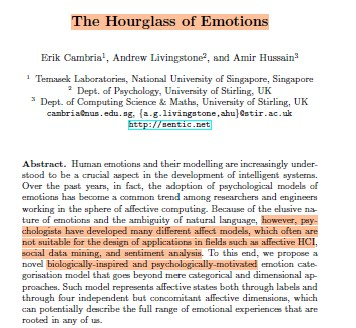   

/https://sentic.net/hourglass-model-revisited.pdf


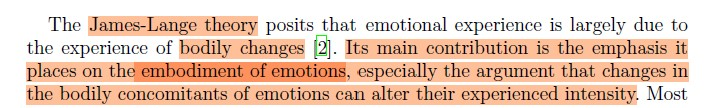

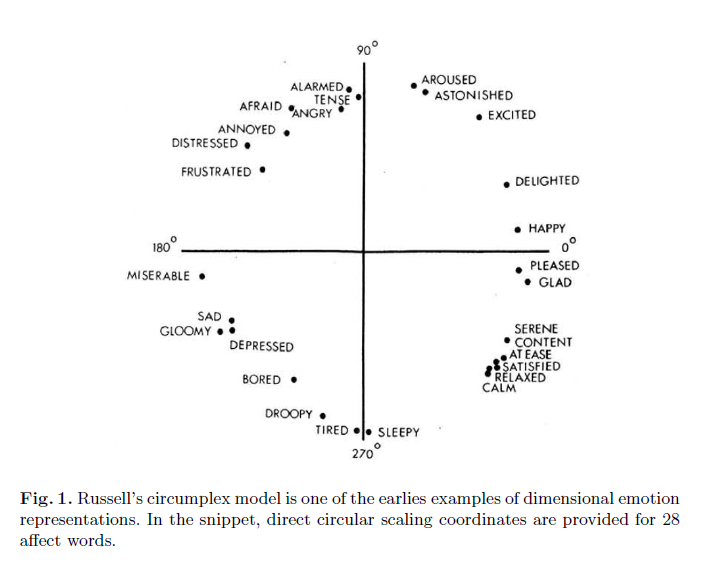

In [4]:
#input_text_path = './data/senticnet/senticnet.txt'       #In case, that we want to use other senticnet
#output_tsv_path = './data/senticnet/senticnet.tsv'
#shutil.copyfile(input_text_path, output_tsv_path)
#print("TSV file saved as:", output_tsv_path)

In [6]:
processor = SpeechProcessor('../../data/senticnet/senticnet2.tsv')


In [7]:
processor.categories

['INTROSPECTION', 'TEMPER', 'ATTITUDE', 'SENSITIVITY']

- Introspection
Synonyms: Self-reflection, self-analysis, soul-searching, inner thought
Sentence: During her vacation, Maria took time for introspection to rethink her life goals.

- Temper
Synonyms: Anger, mood, irritation, rage, fury
Sentence: David’s short temper often got him into trouble with his friends.

- Attitude
Synonyms: Mindset, outlook, perspective, approach, stance
Sentence: Liam’s positive attitude inspired his entire team.

- Sensitivity
Synonyms: Delicacy, vulnerability, awareness, emotionality
Sentence: Her sensitivity to others’ feelings made her a great listener.

In [8]:
senticnet = processor.senticnet_data

In [9]:
senticnet.shape

(300000, 14)

In [10]:
senticnet[20:30]

CONCEPT  INTROSPECTION  TEMPER  ATTITUDE  SENSITIVITY  PRIMARY EMOTION  \
20    abandons         -0.329   0.000     0.000        0.000      #melancholy   
21     abandum          0.000   0.000     0.000        0.826      #enthusiasm   
22      abanet          0.000   0.000     0.000        0.826      #enthusiasm   
23      abanga          0.000   0.000     0.000        0.826      #enthusiasm   
24      abanic          0.000   0.000     0.000        0.826      #enthusiasm   
25  abannition          0.962   0.000     0.764        0.000         #ecstasy   
26     abantes          0.000   0.000     0.000        0.826      #enthusiasm   
27    abarambo          0.000   0.000     0.000        0.297  #responsiveness   
28   abarbarea          0.000   0.999     0.000        0.000           #bliss   
29      abaris         -0.909   0.000    -0.772        0.000           #grief   

   SECONDARY EMOTION POLARITY VALUE  POLARITY INTENSITY        SEMANTICS  \
20               NaN       negative              -0.329       melancholy   
21               NaN       positive               0.826           abanet   
22               NaN       positive               0.826          abandum   
23               NaN       positive               0.826          abandum   
24               NaN       positive               0.826          abandum   
25          #delight       positive               0.863   antiannexation   
26               NaN       positive               0.826          abandum   
27               NaN       positive               0.297      abarthrosis   
28               NaN       positive               0.999  debarbarization   
29         #loathing       negative              -0.841         antiaris   

          Unnamed: 10       Unnamed: 11          Unnamed: 12   Unnamed: 13  
20            pensive             empty           down_heart     nostalgia  
21             abanga            abanic              abantes     abbandono  
22             abanga            abanic              abantes     abbandono  
23             abanet            abanic              abantes     abbandono  
24             abanet            abanga              abantes     abbandono  
25  antiannexationist            deanna               deanne      disannex  
26             abanet            abanga               abanic     abbandono  
27    antibartholomew          barbless             barkless       barless  
28        debarbarize      nonbarbarian          nonbarbaric  nonbarbarous  
29     antiaristocrat  antiaristotelian  antiaristotelianism      unarisen

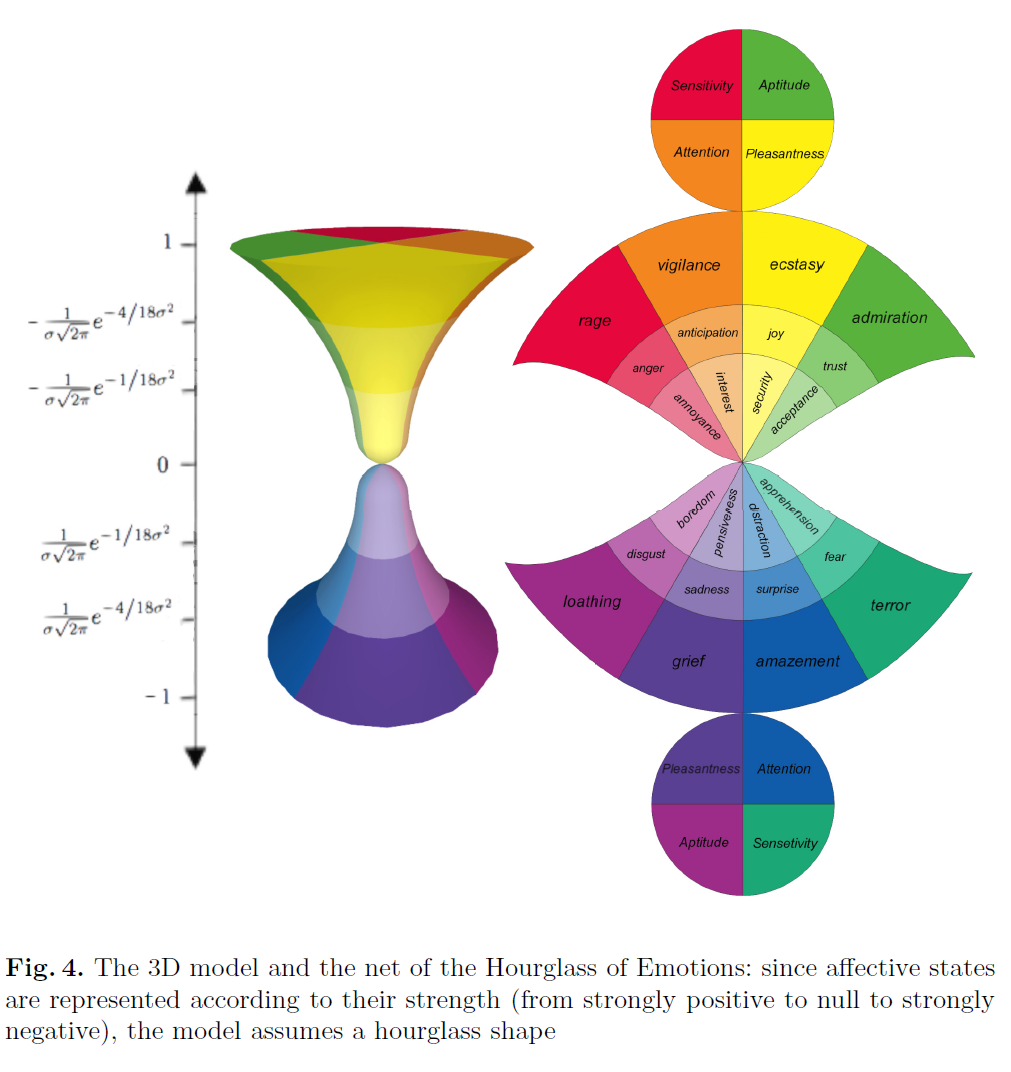

In [11]:
senticnet[110000:110009]

CONCEPT  INTROSPECTION  TEMPER  ATTITUDE  SENSITIVITY  \
110000  heresiographies          0.965     0.0     0.757        0.000   
110001    heresiography          0.965     0.0     0.757        0.000   
110002     heresiologer          0.965     0.0     0.757        0.000   
110003    heresiologies          0.965     0.0     0.757        0.000   
110004    heresiologist          0.965     0.0     0.757        0.000   
110005      heresiology          0.965     0.0     0.757        0.000   
110006           heresy          0.965     0.0     0.757        0.000   
110007     heresyphobia          0.000     0.0     0.000       -0.946   
110008      heresyproof         -0.965     0.0    -0.757        0.000   

       PRIMARY EMOTION SECONDARY EMOTION POLARITY VALUE  POLARITY INTENSITY  \
110000        #ecstasy          #delight       positive               0.861   
110001        #ecstasy          #delight       positive               0.861   
110002        #ecstasy          #delight       positive               0.861   
110003        #ecstasy          #delight       positive               0.861   
110004        #ecstasy          #delight       positive               0.861   
110005        #ecstasy          #delight       positive               0.861   
110006        #ecstasy          #delight       positive               0.861   
110007         #terror               NaN       negative              -0.946   
110008          #grief         #loathing       negative              -0.861   

          SEMANTICS  Unnamed: 10  Unnamed: 11  Unnamed: 12  Unnamed: 13  
110000      epistle       gospel      canonic   apocryphal    apocrypha  
110001      epistle       gospel      canonic   apocryphal    apocrypha  
110002      epistle       gospel      canonic   apocryphal    apocrypha  
110003      epistle       gospel      canonic   apocryphal    apocrypha  
110004      epistle       gospel      canonic   apocryphal    apocrypha  
110005      epistle       gospel      canonic   apocryphal    apocrypha  
110006      epistle       gospel      canonic   apocryphal    apocrypha  
110007        sweat        scare       shiver       scream        shake  
110008  heresyproof  heresyproof  heresyproof  heresyproof  heresyproof

## SentmentFlow in Micortext 

Our hypothesis is that people express their global sentiment on a topic with
similar sequences of local sentiment independent of the domain. We model such
sentiment flow robustly under uncertainty
through abstraction. To test our hypothesis, we predict global sentiment based on
sentiment flow. In systematic experiments,
we improve over the domain independence
of strong baselines. Our findings suggest
that sentiment flow qualifies as a general
model of web review argumentation

In [12]:
df = pd.read_json("../data/dfMT-PC_SA_CP_topicID_AduType.json") 

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112 entries, 0 to 111
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   EDU        112 non-null    object
 1   adu_type   112 non-null    object
 2   topic_id   89 non-null     object
 3   Relations  112 non-null    object
 4   Label      112 non-null    object
 5   STANCE     89 non-null     object
dtypes: object(6)
memory usage: 6.1+ KB


In [14]:
df[0:5]   

EDU  \
0                                                                                                                          [Yes, it's annoying and cumbersome to separate your rubbish properly all the time., Three different bin bags stink away in the kitchen and have to be sorted into different wheelie bins., But still Germany produces way too much rubbish, and too many resources are lost when what actually should be separated and recycled is burnt., We Berliners should take the chance and become pioneers in waste separation!]   
1  [One can hardly move in Friedrichshain or Neukölln these days without permanently scanning the ground for dog dirt., And when bad luck does strike and you step into one of the many 'land mines' you have to painstakingly scrape the remains off your soles., Higher fines are therefore the right measure against negligent, lazy or simply thoughtless dog owners., Of course, first they'd actually need to be caught in the act by public order officers,, but once they have to dig into their pockets, their laziness will sure vanish!]   
2                                                                                                                   [Health insurance companies should not cover treatment in complementary medicine, unless the promised effect and its medical benefit have been concretely proven., Yet this very proof is lacking in most cases., Patients do often report relief of their complaints after such treatments., But as long as it is unclear as to how this works, the funds should rather be spent on therapies where one knows with certainty.]   
3                                          [Of course there are a number of programmes in public broadcasting that are not worth the licencing fee,, and others, such as “Musikantenstadl” and soap operas, are only interesting to certain audiences., Nevertheless, everybody should contribute to the funding of the public broadcasters in equal measure,, for we need general and independent media., After all we want to get our view of the world neither through the lens of the government nor through that of rich media entrepreneurs.]   
4                                                                                                                                   [Intelligence services must urgently be regulated more tightly by parliament;, this should be clear to everyone after the disclosures of Edward Snowden., Granted, those concern primarily the British and American intelligence services,, but the German services evidently do collaborate with them closely., Their tools, data and expertise have been used to keep us under surveillance for a long time.]   

                    adu_type                                       topic_id  \
0  [opp, opp, pro, pro, pro]                               waste_separation   
1  [pro, pro, pro, opp, pro]                           higher_dog_poo_fines   
2  [pro, opp, pro, opp, pro]  health_insurance_cover_complementary_medicine   
3  [opp, opp, pro, pro, pro]             public_broadcasting_fees_on_demand   
4  [pro, pro, opp, pro, pro]   stricter_regulation_of_intelligence_services   

                                                      Relations  \
0  [[a1, a5, reb], [a2, a1, sup], [a3, c1, und], [a4, c3, add]]   
1  [[a1, a3, sup], [a2, a3, sup], [a4, a3, reb], [a5, c4, und]]   
2  [[a2, a1, reb], [a3, a2, reb], [a4, a1, reb], [a5, c4, und]]   
3  [[a1, a3, reb], [a2, a3, reb], [a4, a3, sup], [a5, a4, sup]]   
4  [[a2, a1, sup], [a3, c2, und], [a4, c3, und], [a5, a4, sup]]   

             Label STANCE  
0  [0, 0, 0, 0, 1]    pro  
1  [0, 0, 1, 0, 0]    pro  
2  [1, 0, 0, 0, 0]    con  
3  [0, 0, 1, 0, 0]    con  
4  [1, 0, 0, 0, 0]    pro

In [15]:
df2 = pd.read_json("../data/dfMT2-PC_SA_CP_topicID_AduType.json") 

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 171 entries, 0 to 170
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   EDU        171 non-null    object
 1   adu_type   171 non-null    object
 2   topic_id   171 non-null    object
 3   Relations  171 non-null    object
 4   Label      171 non-null    object
 5   STANCE     171 non-null    object
dtypes: object(6)
memory usage: 9.4+ KB


In [37]:
df2[0:10]

EDU  \
0                                                                                                                                                                                                                                                                                                                 [Hunting is good for the environment, because overpopulated species can be thinned out., Getting rid of an overpopulation enables the smaller animals in the food chain to grow., It also allows for nature to take back the woods and grasslands, which will also enable other wildlife to grow., Some people may object to hunting on the basis of humane treatment of animals., Animals do not necessarily feel pain as we do,, and if there are not enough resources to sustain an overpopulation, then a quick bullet or arrow is better than slow starvation.]   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            [In some cases, hunting can remove threats to the environment., Texas, in particular, has an overabundance of wild/feral boars that destroy farmers' fields, and root up other ground, too., Furthermore, hunting your own meat saves up the natural resources that would otherwise be used in a processing plant., Hunting is good for the environment.]   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       [We should continue hunting, as it provides a sustainable resource., Hunting thins the herd of animals and makes the group as a whole healthier., Some would argue that hunting puts a species at risk for extinction,, but good wildlife management practices mitigate this risk., Overall, hunting poses no real threat to the environment.]   
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           [In the absence of wolves and other large predators, humans become the deer population control to keep to deer from over-grazing regional flora., The ecosystem needs this delicate balance,, so it is also important not to over-hunt., As long as restraint and practicality are applied to hunting, the environment will not suffer., Hunting is good.]   
4                                                                                            [I believe that older people don't make better parents., While they do have more experience in life, and may be able to offer their child more guidance when it comes to difficult decisions that child will have to face,, they also are going to have a more difficult time staying active with the child., Children are INCREDIBLY active, and it takes a lot of energy to keep up with them., It would seem to me to discourage physical activity if the parents are older, and 

In [19]:
df3 = pd.read_json("../data/dfPE_PC_SA_ST_Stance.json")  #PE corpus  #add stance of claims

In [20]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 402 entries, 0 to 401
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   File          402 non-null    object
 1   Stance        402 non-null    object
 2   Essay         402 non-null    object
 3   EDU           402 non-null    object
 4   Label         402 non-null    object
 5   Relations     402 non-null    object
 6   semanticType  402 non-null    object
dtypes: object(7)
memory usage: 25.1+ KB


In [21]:
df3[0:5]

File  \
0  essay001.ann   
1  essay002.ann   
2  essay003.ann   
3  essay004.ann   
4  essay005.ann   

                                                                                  Stance  \
0                    [None, None, For, None, None, None, Against, None, None, None, For]   
1  [None, None, None, For, None, None, None, None, None, For, None, None, None, Against]   
2                             [None, None, For, None, None, None, None, For, None, None]   
3                    [None, None, Against, For, For, None, None, None, None, None, None]   
4               [None, None, For, For, For, None, None, None, None, None, None, Against]   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           Essay  \
0  Should students be taught to compete or to cooperate?\n\nIt is always said that competition can effectively promote the development of economy. In order to survive in the competition, companies continue to improve their products and service, and as a result, the whole society prospers. However, when we discuss the issue of competition or cooperation, what we are concerned about is not the whole society, but the development of an individual's whole life. From this point of view, I firmly believe that we should attach more importance to cooperation during primary education.\nFirst of all, through cooperation, children can learn about interpersonal skills which are significant in the future life of all students. What we acquired from team work is not only how to achieve the same goal with others but more importantly, how to get along with others. During the process of cooperation, children can learn about how to listen to opinions of others, how to communicate with others, how to think comprehensively, and even how to compromise with other team members when conflicts occurred. All o

In [17]:
#df4   maybe refactor the data to do stance classifcation on  ADU level ?!
# https://huggingface.co/datasets/ibm-research/claim_stance?row=99

#https://huggingface.co/datasets/DFKI-SLT/sciarg  other idea

# Stance & Arg

https://aclanthology.org/W15-0509.pdf

Relating to stance classification, it can be helpful to take a view on the sentiment and opinion term and the target term. IBM defined the target of a claim of an argument as the central noun phrase, about which the claim or argument, respectively, makes a positive or negative statement (Bar-Haim et al., 2017a). For example, the target of the claim “Therefore, there are many hints for God’s existence” is God’s existence. The sentiment “is a type of linguistic subjectivity, specifically positive and negative expressions of emotions, judgements, and evaluations” (Somasundaran and Wiebe, 2010). The sentiment sketches the polarity, the personal
opinion on a topic. Therefore, the sentiment is a clue for the stance, but the sentiment alone is not sufficient for stance classification (Mohammad et al., 2017). Consider the claim “The belief in God’s existence is an outdated idea.” The sentiment is negative. The personal opinion of the author is contrastive to the topic “God’s existence” and in that case, this claim is the conclusion of a CON argument. If the topic is atheism, then the sentiment is still negative, but now the argument argues for the topic. Therefore, the stance is PRO and not CON. Furthermore, an author can express his stance without sentiment. This thesis defines stance classification as a task to classify the stance of an argument (this paper has an inside view on the claim of the argument) towards a topic. We assume that the argument is related to the topic. Therefore, it is a binary classification problem. An algorithm should compute this classification. This NLP task is called stance detection if there is no assumption that the argument is related to the topic (Stede and Schneider, 2018). Stance classification is not a trivial task. Therefore, many types of research exist about the topic. This thesis sketches some approaches in the next Section (Section 2.2.2). The approach of this paper is described in Chapter 3.
- https://philippheinisch.de/info/stance_classification.pdf

https://aclanthology.org/E17-1024.pdf

The Hourglass of Emotions model, proposed by Cambria et al., provides a framework for understanding emotions along four key affective dimensions: Pleasantness, Attention, Sensitivity, and Aptitude, with each dimension having positive and negative polarities. Using this model in Argumentation Mining (AM)—especially for Stance Classification—can help enhance classification accuracy by capturing emotional signals that often correlate with stance-taking. Here's how it can be applied:

1. Mapping Emotions to Stance Labels
Stances (e.g., pro or con) often carry distinct emotional cues. By leveraging the Hourglass model, we can identify emotional intensities associated with different stance categories.
Pro-stance arguments may include positive emotions (e.g., joy, optimism).
Con-stance arguments might have negative emotions (e.g., anger, fear, disgust).
Neutral or mixed stances may involve emotions like surprise or ambiguity.
2. Feature Engineering with Emotion Embeddings
Extract emotional features using sentiment analysis tools (e.g., SenticNet, NRC Emotion Lexicon) aligned with the Hourglass framework.
Use these features as input into stance classification models to improve predictive power.
3. Contextualizing Arguments
Emotion-based embeddings can help disambiguate sarcastic or implicit arguments, improving performance in identifying stances in complex debates.
By modeling how emotions shift throughout an argument, we can track emotional trajectories, which help in dynamic stance classification.
4. Enhancing Neural Models
Fine-tune transformers (e.g., BERT, RoBERTa) by integrating emotion-aware embeddings.
Use multi-task learning where one branch focuses on emotion classification and another on stance detection, sharing learned representations.
5. Applications in Social Media & Debates
In Twitter stance detection, emotion features can improve generalization when arguments are short and lack explicit stance markers.
In political or legal debates, emotions can reveal ideological leanings that correlate with stance positions.
By incorporating the Hourglass of Emotions, argumentation mining—especially stance classification—can move beyond lexical cues and capture the affective depth of arguments, leading to more nuanced and accurate classifications.

Would you like help implementing this approach in code or designing an experiment?

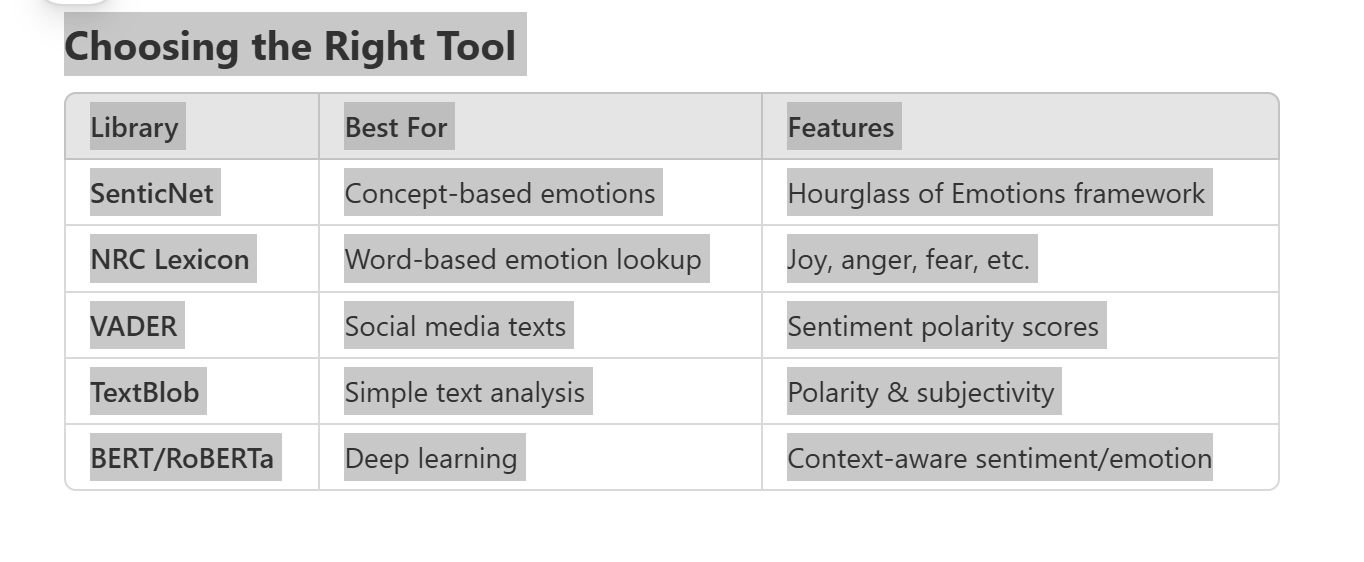

Choosing the Right Tool
Library	Best For	Features
SenticNet	Concept-based emotions	Hourglass of Emotions framework
NRC Lexicon	Word-based emotion lookup	Joy, anger, fear, etc.
VADER	Social media texts	Sentiment polarity scores
TextBlob	Simple text analysis	Polarity & subjectivity
BERT/RoBERTa	Deep learning	Context-aware sentiment/emotion

In [ ]:
import spacy
from nrclex import NRCLex

nlp = spacy.load("en_core_web_sm")

text = "I am extremely happy and joyful today!"

doc = nlp(text)

nrc_sentiment = NRCLex(text)

print(nrc_sentiment.affect_frequencies)


{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 'trust': 0.2857142857142857, 'surprise': 0.0, 'positive': 0.2857142857142857, 'negative': 0.0, 'sadness': 0.0, 'disgust': 0.0, 'joy': 0.2857142857142857, 'anticipation': 0.14285714285714285}


In [34]:
nrc_sentiment.top_emotions

[('trust', 0.2857142857142857),
 ('positive', 0.2857142857142857),
 ('joy', 0.2857142857142857)]

In [36]:
nrc_sentiment.affect_list

['anticipation', 'joy', 'positive', 'trust', 'joy', 'positive', 'trust']

In [18]:
df4 = pd.read_json('..\data\df_IBM.json')

In [35]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55 entries, 0 to 54
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   topic_id         55 non-null     object
 1   EDU              55 non-null     object
 2   adu_type         55 non-null     object
 3   targetsRelation  55 non-null     object
 4   Compatible       55 non-null     object
dtypes: object(5)
memory usage: 2.6+ KB


- c claim, t topic
- claim target xc  
- claim sentiment sc ∈ {−1,1}
- topic target xt 
- topic sentiment


 (topic target, 
topic sentiment towards its target, claim target, claim sentiment towards its target, and the relation 
between the targets).  

https://arxiv.org/pdf/2409.13594 read this 



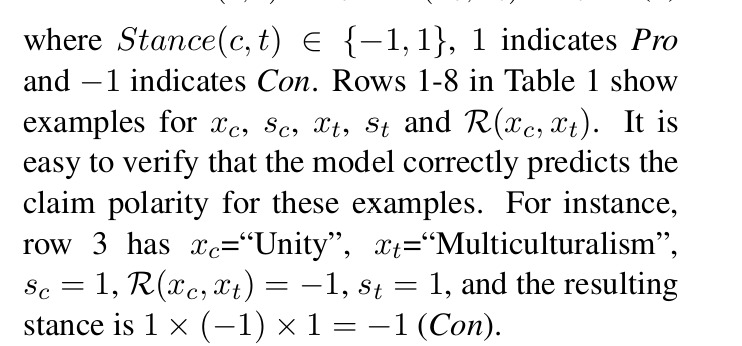

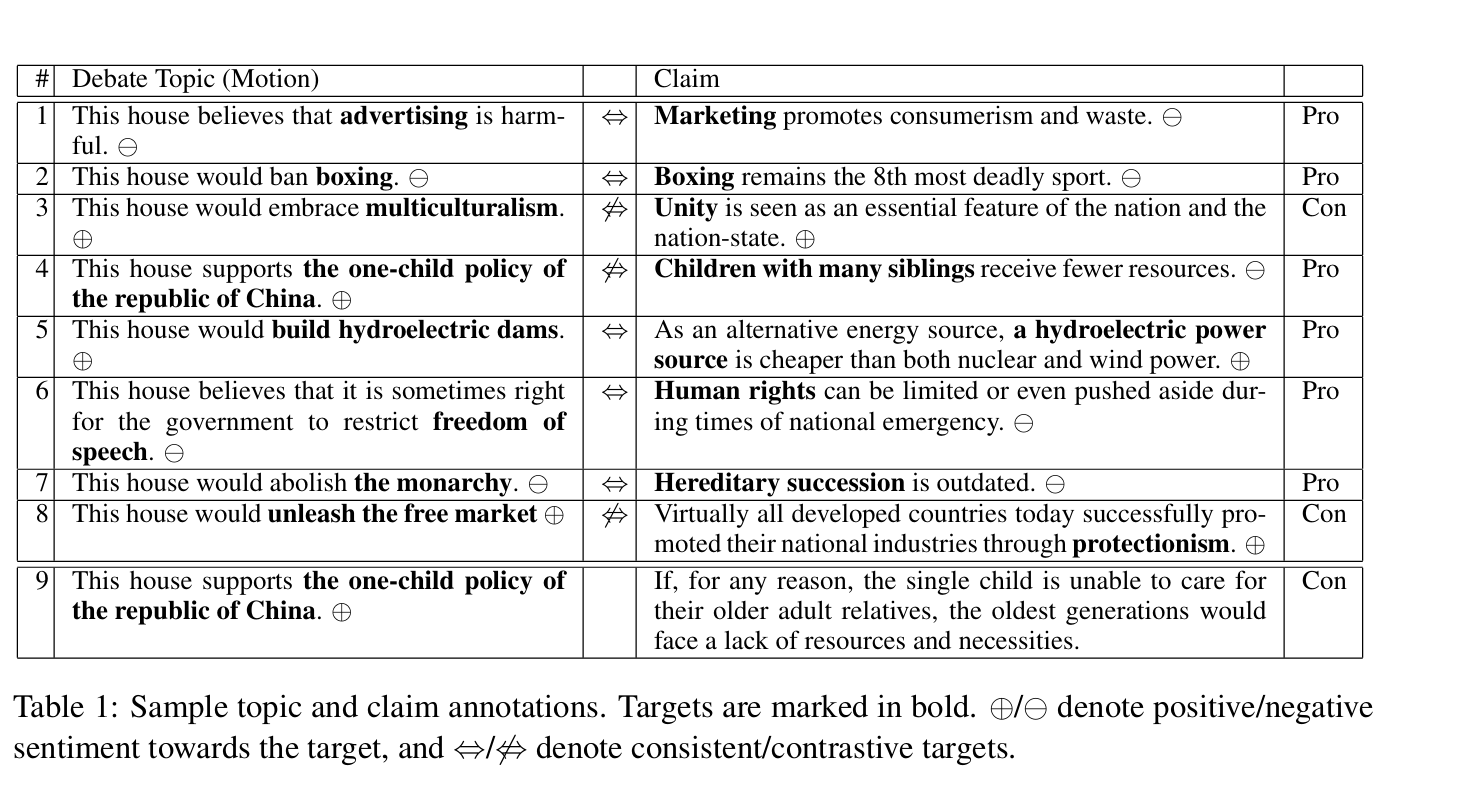

In [39]:
df4.EDU[0][0]

'exposure to violent video games causes at least a temporary increase in aggression and that this exposure correlates with aggression in the real world'

In [19]:
df4[0:3]

topic_id  \
0                      the sale of violent video games to minors   
1                  the one-child policy of the republic of China   
2  the use of performance enhancing drugs in professional sports   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

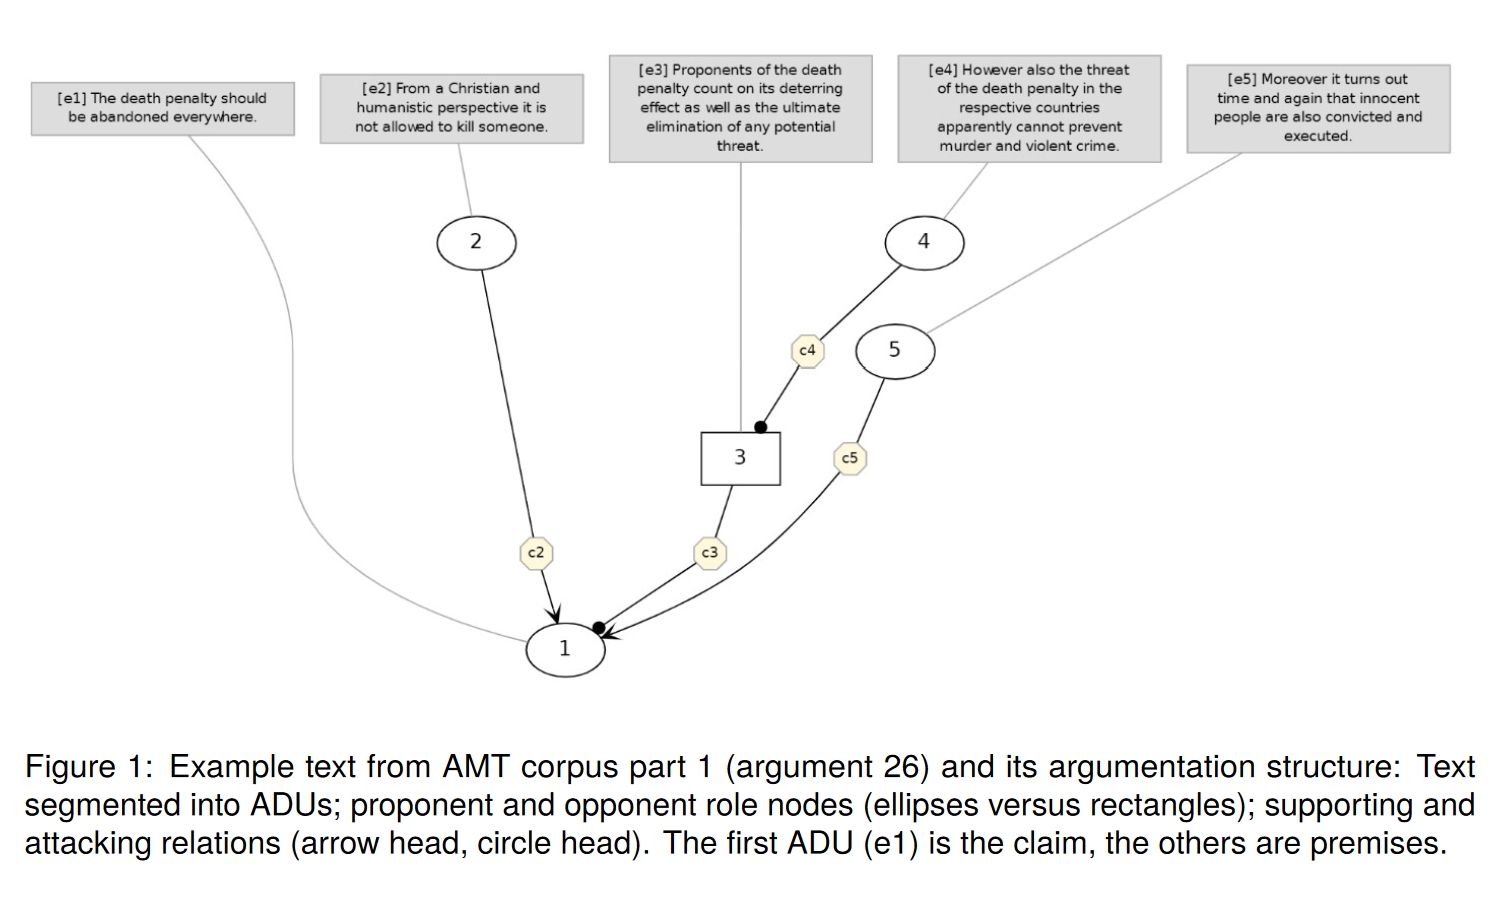

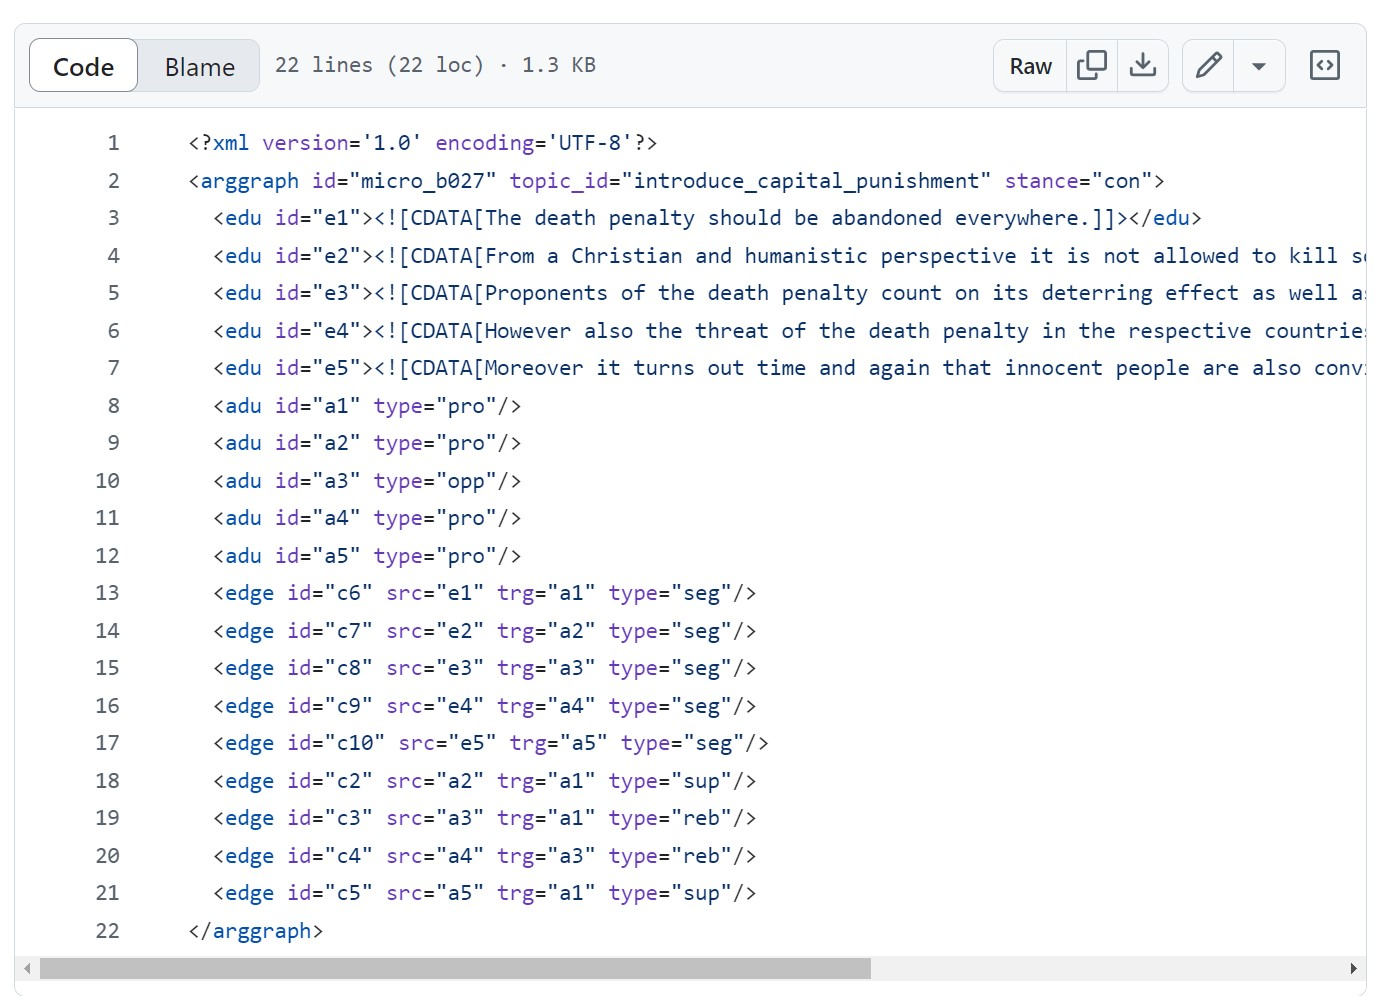

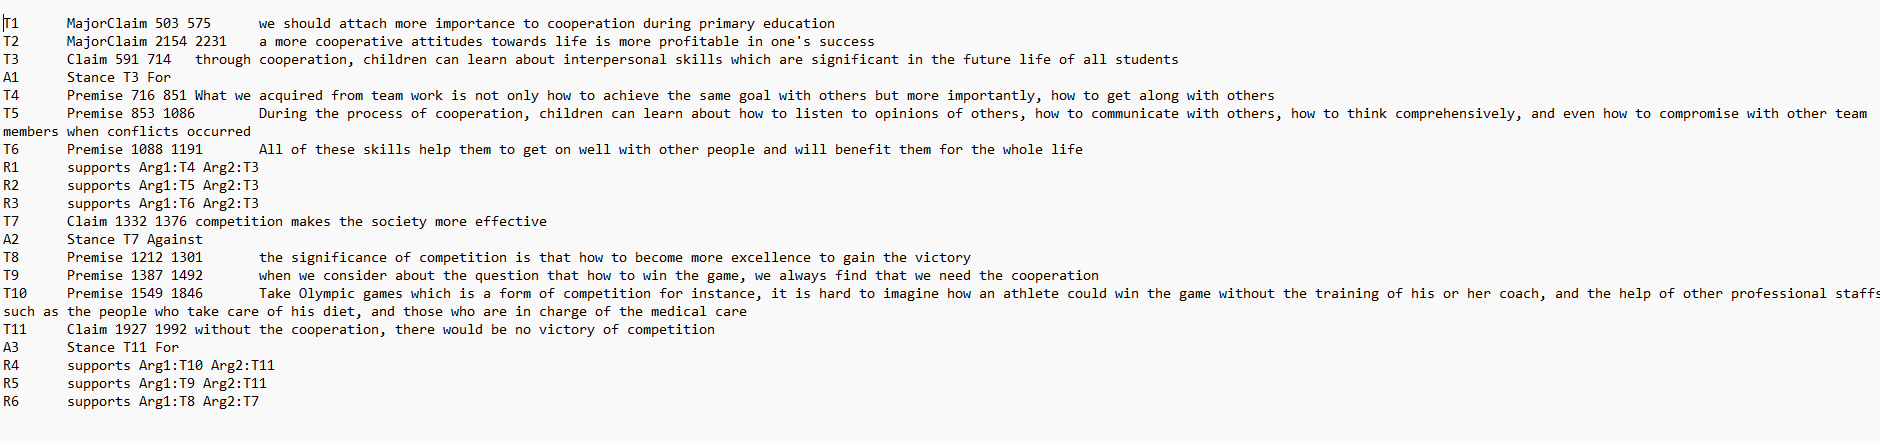

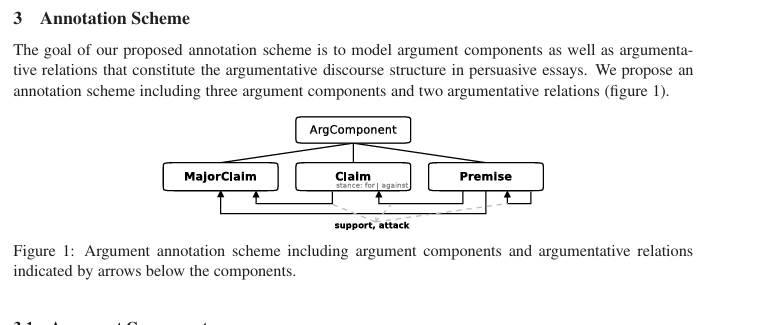

Following Walton (2009), a counter-argument can
be defined as an attack on a specific argument
by arguing against either its claim (called rebuttal), the validity of reasoning of its premises toward its claim (undercut), or the validity of one of
its premises (undermining)

As an example, consider the short hotel review at the top and bottom of Figure 1. It contains more positive than negative statements. Hence, a surface-level analysis would probably classify the review to have a positive overall

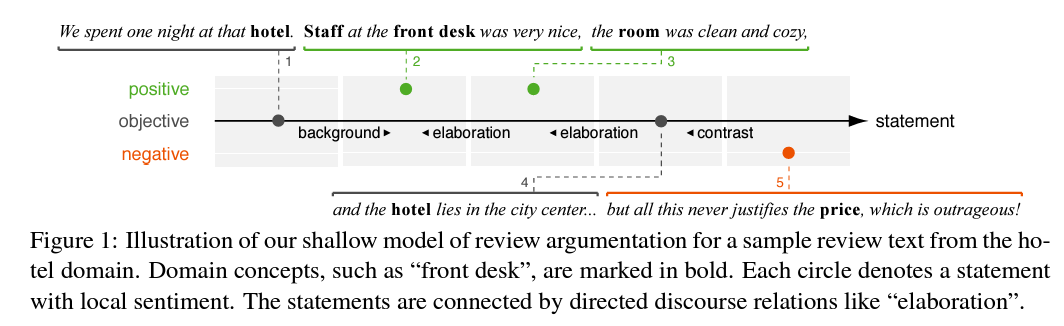

we map pos to 1.0, obj to 0.5, and neg to 0.0.

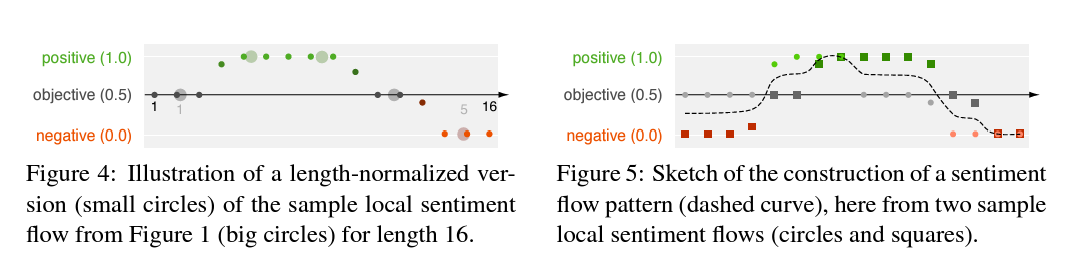

In [20]:
df[0:4]

EDU  \
0                                                                                                                          [Yes, it's annoying and cumbersome to separate your rubbish properly all the time., Three different bin bags stink away in the kitchen and have to be sorted into different wheelie bins., But still Germany produces way too much rubbish, and too many resources are lost when what actually should be separated and recycled is burnt., We Berliners should take the chance and become pioneers in waste separation!]   
1  [One can hardly move in Friedrichshain or Neukölln these days without permanently scanning the ground for dog dirt., And when bad luck does strike and you step into one of the many 'land mines' you have to painstakingly scrape the remains off your soles., Higher fines are therefore the right measure against negligent, lazy or simply thoughtless dog owners., Of course, first they'd actually need to be caught in the act by public order officers,, but once they have to dig into their pockets, their laziness will sure vanish!]   
2                                                                                                                   [Health insurance companies should not cover treatment in complementary medicine, unless the promised effect and its medical benefit have been concretely proven., Yet this very proof is lacking in most cases., Patients do often report relief of their complaints after such treatments., But as long as it is unclear as to how this works, the funds should rather be spent on therapies where one knows with certainty.]   
3                                          [Of course there are a number of programmes in public broadcasting that are not worth the licencing fee,, and others, such as “Musikantenstadl” and soap operas, are only interesting to certain audiences., Nevertheless, everybody should contribute to the funding of the public broadcasters in equal measure,, for we need general and independent media., After all we want to get our view of the world neither through the lens of the government nor through that of rich media entrepreneurs.]   

                    adu_type                                       topic_id  \
0  [opp, opp, pro, pro, pro]                               waste_separation   
1  [pro, pro, pro, opp, pro]                           higher_dog_poo_fines   
2  [pro, opp, pro, opp, pro]  health_insurance_cover_complementary_medicine   
3  [opp, opp, pro, pro, pro]             public_broadcasting_fees_on_demand   

                                                      Relations  \
0  [[a1, a5, reb], [a2, a1, sup], [a3, c1, und], [a4, c3, add]]   
1  [[a1, a3, sup], [a2, a3, sup], [a4, a3, reb], [a5, c4, und]]   
2  [[a2, a1, reb], [a3, a2, reb], [a4, a1, reb], [a5, c4, und]]   
3  [[a1, a3, reb], [a2, a3, reb], [a4, a3, sup], [a5, a4, sup]]   

             Label STANCE  
0  [0, 0, 0, 0, 1]    pro  
1  [0, 0, 1, 0, 0]    pro  
2  [1, 0, 0, 0, 0]    con  
3  [0, 0, 1, 0, 0]    con

In [21]:
#df = df.drop(98, axis = 0)   #remove the row with STANCE UNCLEAR

In [22]:
#df = df.drop(labels = range(61,85), axis = 0)   #remove the row without topic_id and STANCE

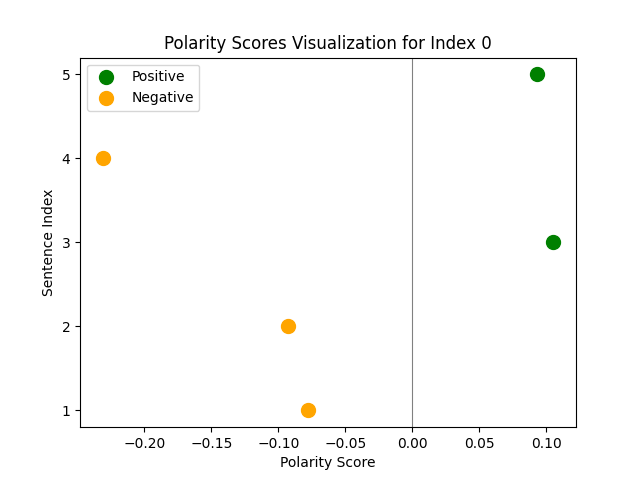

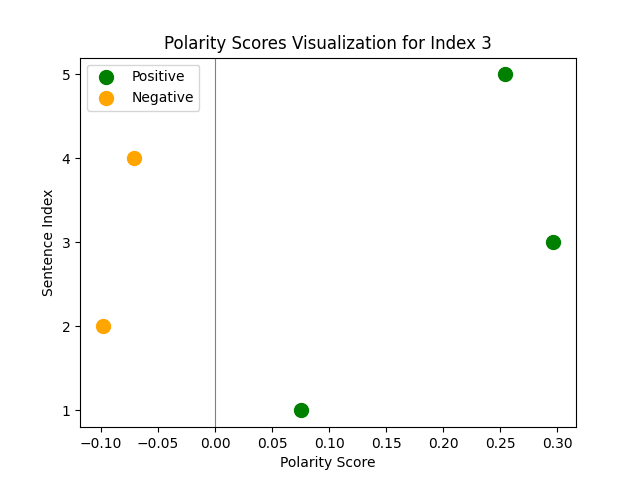

In [23]:
sr = df["EDU"]


In [24]:
sr[0]

["Yes, it's annoying and cumbersome to separate your rubbish properly all the time.",
 'Three different bin bags stink away in the kitchen and have to be sorted into different wheelie bins.',
 'But still Germany produces way too much rubbish',
 'and too many resources are lost when what actually should be separated and recycled is burnt.',
 'We Berliners should take the chance and become pioneers in waste separation!']

In [25]:
sr[2]

['Health insurance companies should not cover treatment in complementary medicine',
 'unless the promised effect and its medical benefit have been concretely proven.',
 'Yet this very proof is lacking in most cases.',
 'Patients do often report relief of their complaints after such treatments.',
 'But as long as it is unclear as to how this works, the funds should rather be spent on therapies where one knows with certainty.']

In [26]:
sr[54]

['A violation of international law should be more than enough to consider a reaction!',
 'Humanity has made enough mistakes throughout history by waiting too long, and when it has finally reacted, the only remaining option has usually been war.',
 "It's to be noted that in our civilized world, in a democratic country, the people can determine their own fate,",
 "as long as the motivation of those people isn't triggered by propaganda, corruption and military pressure.",
 'Since, however, in Russia besides gas and oil only propaganda and corruption rule,',
 'the EU should intervene right away.']

In [27]:
print(df.columns)


Index(['EDU', 'adu_type', 'topic_id', 'Relations', 'Label', 'STANCE'], dtype='object')


In [28]:
print(df2.columns)


Index(['EDU', 'adu_type', 'topic_id', 'Relations', 'Label', 'STANCE'], dtype='object')


In [39]:
import plotly.graph_objects as go
from ipywidgets import interact
import pandas as pd

def categorize_adu_type(value):
    """Convert adu_type to numerical value."""
    if value.lower() == "pro":
        return 1
    elif value.lower() == "opp":
        return -1
    else:
        return 0

def create_interactive_flow(df, index, topic_id, stance):
    """Create an interactive flow plot based on adu_type for each sentence."""
    sentences = df['EDU'].iloc[index]  
    adu_types = df['adu_type'].iloc[index]  

    plot_df = pd.DataFrame({
        "Sentence": sentences,
        "ADU_Type": adu_types,
        "Value": [categorize_adu_type(adu) for adu in adu_types]
    })

    fig = go.Figure()

    for i, row in plot_df.iterrows():
        color = 'blue' if row['Value'] == 1 else 'red' if row['Value'] == -1 else 'gray'
        
        fig.add_trace(go.Scatter(
            x=[row['Value']],
            y=[i + 1],  
            mode='markers',
            marker=dict(size=10, color=color),
            text=row['Sentence'], 
            name=row['Sentence']
        ))

    fig.add_shape(
        type="line",
        x0=0, x1=0,
        y0=0, y1=len(plot_df) + 1,
        line=dict(color="black", width=2)
    )

    fig.update_layout(
        title=f"Stance Flow of ADUs for Index {index} - Topic: '{topic_id}' with '{stance}' Stance",
        xaxis_title="ADU Type (Pro=1, Opp=-1)",
        yaxis_title="Sentence Index",
        yaxis=dict(tickmode='linear', dtick=1),
        xaxis=dict(tickvals=[-1, 0, 1], ticktext=["Opp", "Neutral", "Pro"]),
        showlegend=False,
        height=600
    )

    fig.show()




# Stance Flow of ADUs in  arg-microtexts-part 1

In [40]:
def update_adu_flow(x):
    """Update function for interactive exploration."""
    topic_id = df['topic_id'].iloc[x]
    stance = df['STANCE'].iloc[x]
    create_interactive_flow(df, x, topic_id, stance)

interact(update_adu_flow, x=(0, len(df) - 1, 1))

interactive(children=(IntSlider(value=55, description='x', max=111), Output()), _dom_classes=('widget-interact…

<function __main__.update_adu_flow(x)>

# Missing Annotation for overall stance in arg-microtexts-part 2
- 62 till 84 (texts starting with  in corpus)

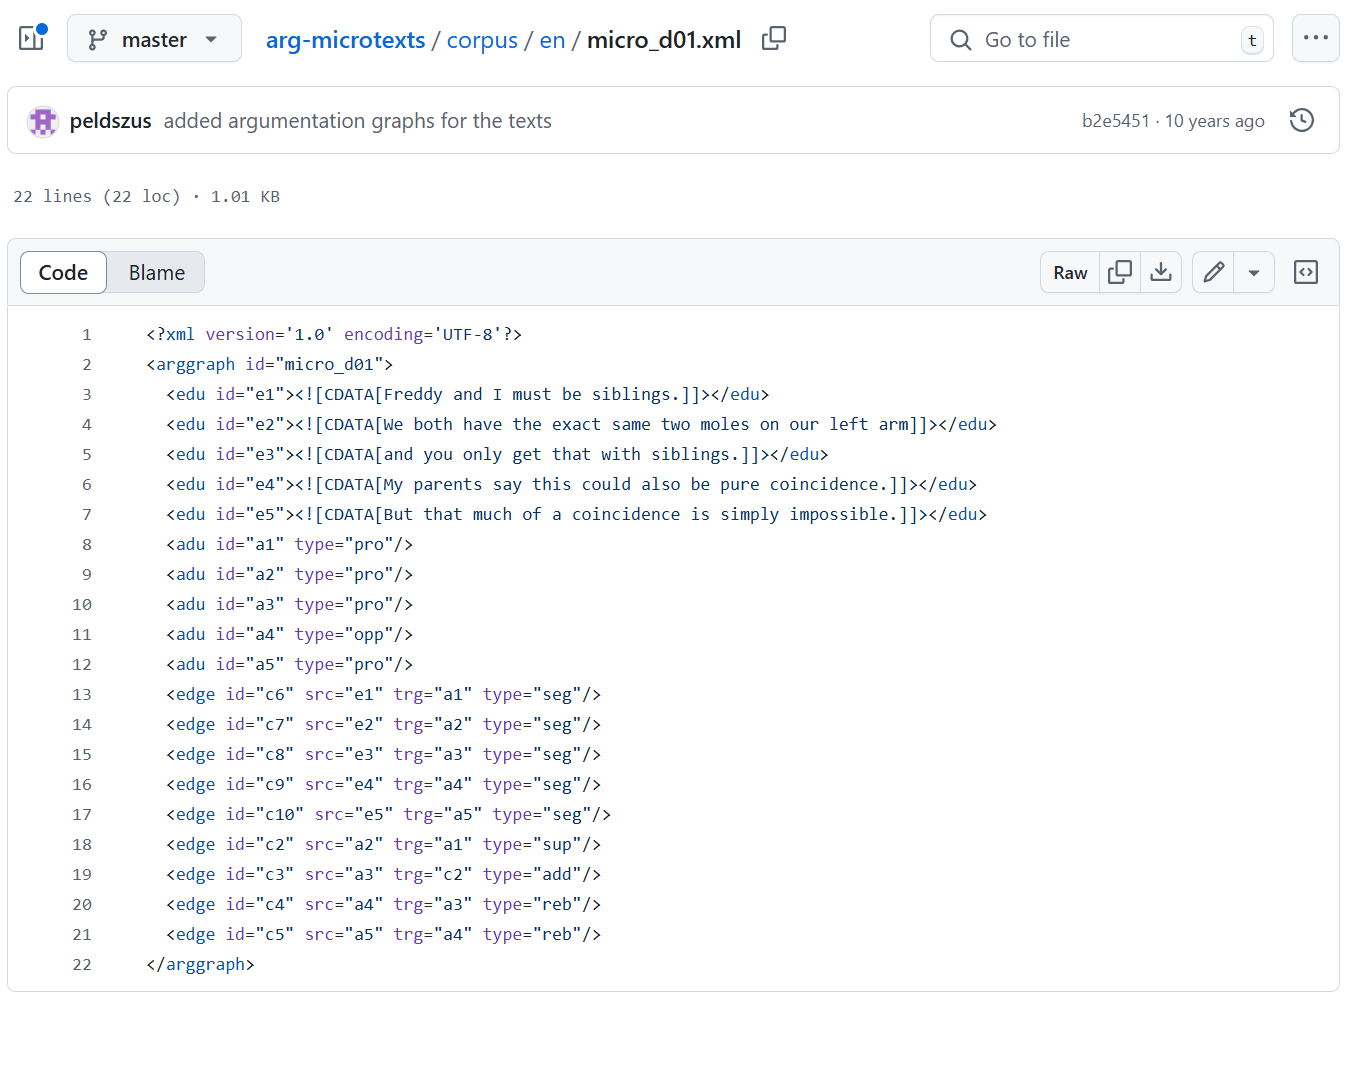

## Stance Flow of ADUs in  arg-microtexts-part 2

In [ ]:
def update_adu_flow(x):
    """Update function for interactive exploration."""
    topic_id = df2['topic_id'].iloc[x]
    stance = df2['STANCE'].iloc[x]
    create_interactive_flow(df2, x, topic_id, stance)

interact(update_adu_flow, x=(0, len(df2) - 1, 1))

interactive(children=(IntSlider(value=85, description='x', max=170), Output()), _dom_classes=('widget-interact…

<function __main__.update_adu_flow(x)>

# The list of Texts from microttext part 2 with wrong numbers of "edu types" in original corpus Part 2 (index+1= text number)

- 2, 4,  16, 22, 25, 30, 35, 41, 44, 48,58, 69, 70, 82, 87, 88, 105,107, 108, 115, 121,141, 142, 148, 151, 153, 164  
- (27 of 170 has the wrongs number of adu types)


https://github.com/discourse-lab/arg-microtexts-part2/tree/master/corpus
https://aclanthology.org/W18-5218.pdf


Finally, there were three cases in which the texts contained segments that the annotators deemed to be irrelevant for the argument, for instance because it provides only background information or reports some personal experience of the author that is only vaguely related. In the original corpus this was not the case and hence lead to tree structures spanning the entire text. Now in the crowdsourced texts, we decided to leave those texts in the corpus and therefore now have segments that are not part of the graph. An example is the beginning of a text on the pros and cons of soft drink can deposits:

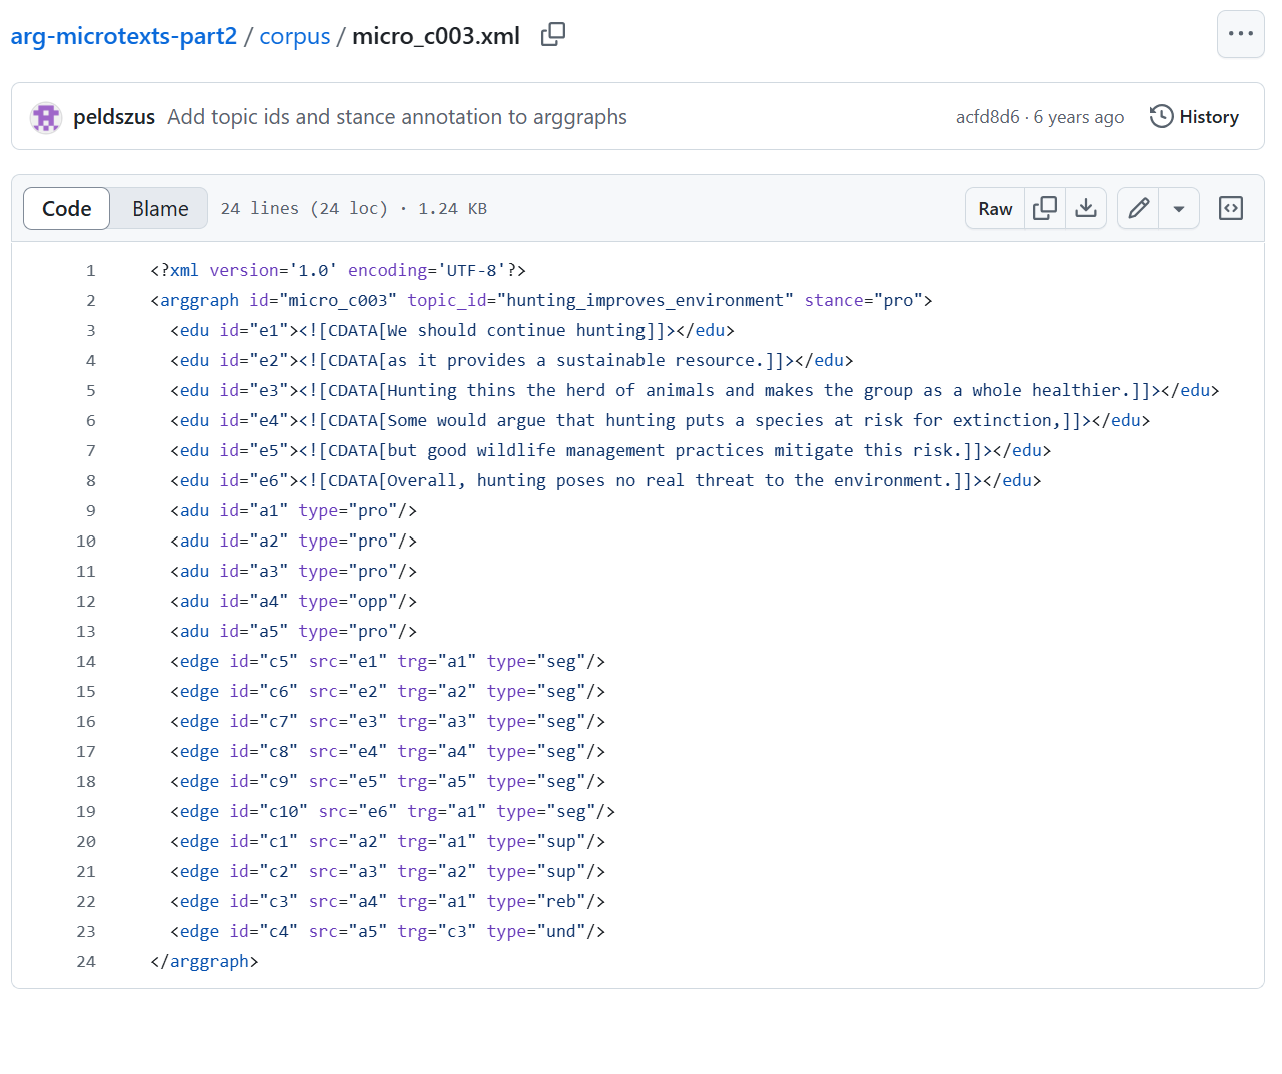
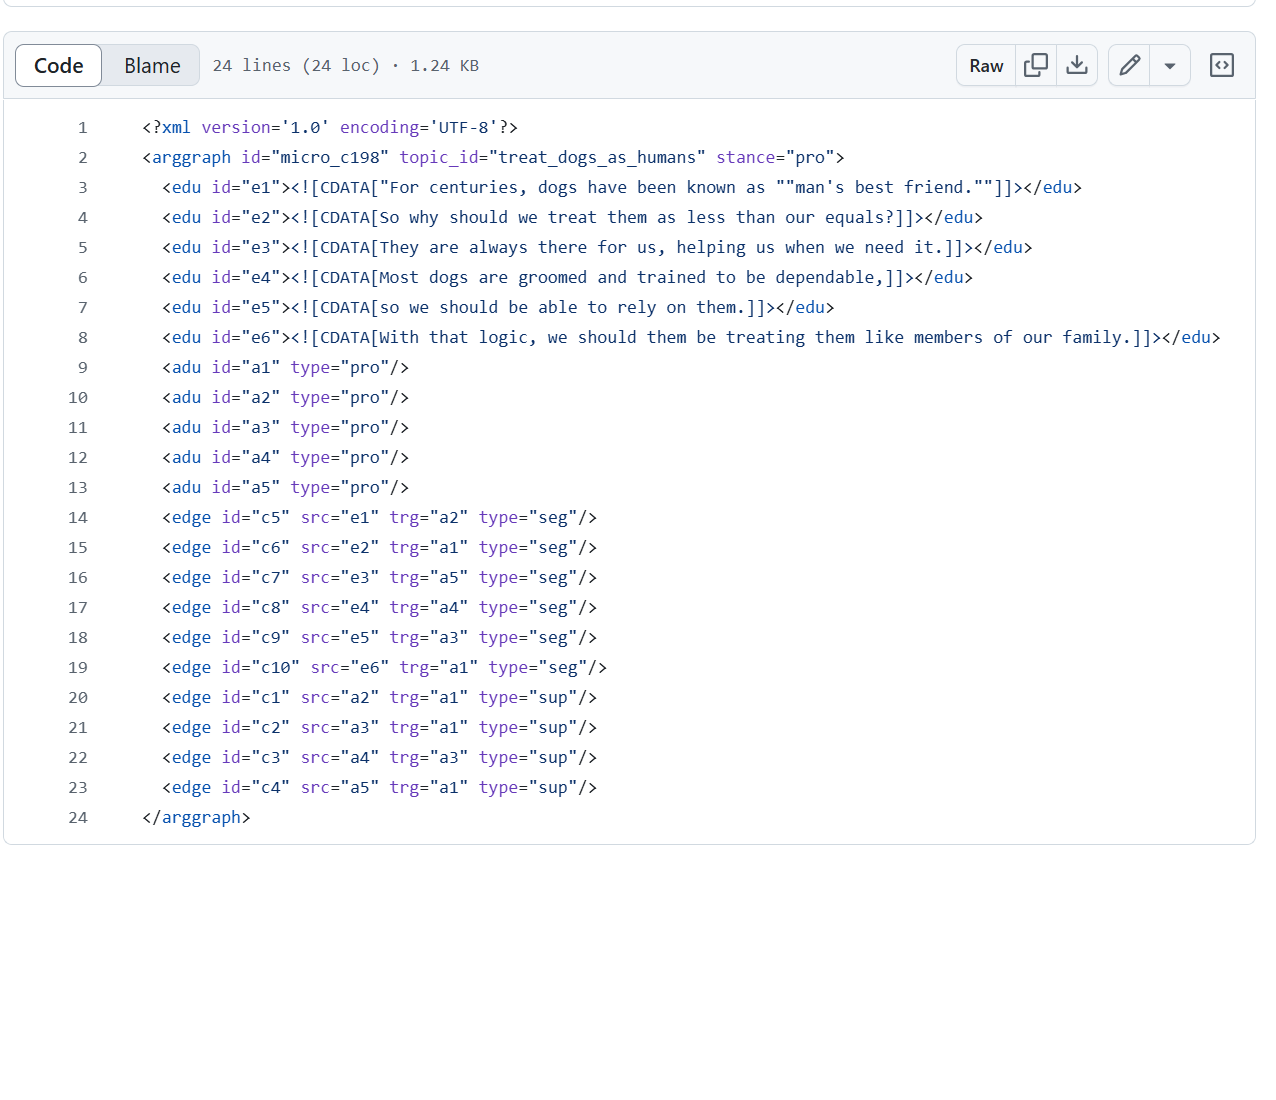

In [41]:
import plotly.express as px
import plotly.graph_objects as go

def categorize_emotion(value, dimension):
    """Categorizes values based on the selected emotion dimension."""
    if value <= -0.05:
        return f"Low {dimension}"
    elif value >= 0.05:
        return f"High {dimension}"
    else:
        return f"Neutral {dimension}"

def create_interactive_plot(df, index, topic_id, stance, dimension):
    """Creates an interactive scatter plot for a chosen emotion dimension."""
    df['Category'] = df[dimension].apply(lambda x: categorize_emotion(x, dimension))
    
    category_colors = {
        f"High {dimension}": "lightgreen",
        f"Neutral {dimension}": "darkgray",
        f"Low {dimension}": "red"
    }
    
    fig = px.scatter(
        df, 
        x=dimension, 
        y=df.index + 1, 
        color='Category',  
        color_discrete_map=category_colors,  
        labels={'color': f'{dimension} Category'},
        hover_data={'text': True},
        category_orders={"Category": [f"High {dimension}", f"Neutral {dimension}", f"Low {dimension}"]}  
    )

    fig.update_traces(marker=dict(size=12), selector=dict(mode='markers'))
    
    fig.add_shape(
        type="line",
        x0=0, x1=0,
        y0=df.index.min(), y1=df.index.max() + 1,
        line=dict(color="black", width=2)  
    )

    fig.update_layout(
        title=f'{dimension} Scores Visualization for Index "{index}" - Topic: "{topic_id}" with "{stance}" Stance',
        xaxis_title=f'{dimension} Score',
        yaxis_title='Sentence Index',
        yaxis=dict(tickmode='linear', tick0=1, dtick=1),
        hovermode='closest',
        legend_title=f"{dimension} Category"
    )

    for category, color in category_colors.items():
        if category not in df['Category'].unique():
            fig.add_trace(go.Scatter(
                x=[None], y=[None], mode='markers',
                marker=dict(color=color, size=12),
                name=category
            ))

    fig.show()


# arg-microtexts-part1

In [42]:
def update_plot(x, selected_dimension="POLARITY"):
    row = df.EDU.iloc[x]  
    polarity_df = processor.process_texts(row)  

    if selected_dimension not in polarity_df.columns:
        print(f"⚠️ Warning: {selected_dimension} is missing. Defaulting to zeros.")
        polarity_df[selected_dimension] = 0  

    create_interactive_plot(polarity_df, x, df.topic_id.iloc[x], df.STANCE[x], selected_dimension)  

interact(update_plot, x=(0, len(df) - 1, 1), selected_dimension=[
    'ATTITUDE', 'INTROSPECTION#ecstasy', 'INTROSPECTION#loathing', 'POLARITY', 
    'SENSITIVITY', 'SENSITIVITY#eagerness', 'SENSITIVITY#enthusiasm', 'SENSITIVITY#loathing', 
    'TEMPER', 'TEMPER#calmness'
])


interactive(children=(IntSlider(value=55, description='x', max=111), Dropdown(description='selected_dimension'…

<function __main__.update_plot(x, selected_dimension='POLARITY')>

# # arg-microtexts-part2

In [43]:
def update_plot(x, selected_dimension="POLARITY"):
    row = df2.EDU.iloc[x]  
    polarity_df = processor.process_texts(row)  

    if selected_dimension not in polarity_df.columns:
        print(f"⚠️ Warning: {selected_dimension} is missing. Defaulting to zeros.")
        polarity_df[selected_dimension] = 0  

    create_interactive_plot(polarity_df, x, df2.topic_id.iloc[x], df2.STANCE[x], selected_dimension)  

interact(update_plot, x=(0, len(df2) - 1, 1), selected_dimension=[
    'ATTITUDE', 'INTROSPECTION#ecstasy', 'INTROSPECTION#loathing', 'POLARITY', 
    'SENSITIVITY', 'SENSITIVITY#eagerness', 'SENSITIVITY#enthusiasm', 'SENSITIVITY#loathing', 
    'TEMPER', 'TEMPER#calmness'
])


interactive(children=(IntSlider(value=85, description='x', max=170), Dropdown(description='selected_dimension'…

<function __main__.update_plot(x, selected_dimension='POLARITY')>

In [33]:
import plotly.graph_objects as go
from ipywidgets import interact
import pandas as pd

def categorize_adu_type_ibm(value):
    """Convert adu_type to numerical value."""
    if value.lower() == "PRO":
        return 1
    elif value.lower() == "CON":
        return -1


def create_interactive_flow_ibm(df, index, topic_id, stance):
    """Create an interactive flow plot based on adu_type for each sentence."""
    sentences = df['EDU'].iloc[index]  
    adu_types = df['adu_type'].iloc[index]  

    plot_df = pd.DataFrame({
        "Sentence": sentences,
        "ADU_Type": adu_types,
        "Value": [categorize_adu_type_ibm(adu) for adu in adu_types]
    })

    fig = go.Figure()

    for i, row in plot_df.iterrows():
        color = 'blue' if row['Value'] == 1 else 'red' if row['Value'] == -1 else 'gray'
        
        fig.add_trace(go.Scatter(
            x=[row['Value']],
            y=[i + 1],  
            mode='markers',
            marker=dict(size=10, color=color),
            text=row['Sentence'], 
            name=row['Sentence']
        ))

    fig.add_shape(
        type="line",
        x0=0, x1=0,
        y0=0, y1=len(plot_df) + 1,
        line=dict(color="black", width=2)
    )

    fig.update_layout(
        title=f"Stance Flow of ADUs for Index {index} - Topic: '{topic_id}' with '{stance}' Stance",
        xaxis_title="ADU Type (Pro=1, Opp=-1)",
        yaxis_title="Sentence Index",
        yaxis=dict(tickmode='linear', dtick=1),
        xaxis=dict(tickvals=[-1 , 1], ticktext=["Opp", "Pro"]),
        showlegend=False,
        height=600
    )

    fig.show()




In [34]:
def update_adu_flow_ibm(x):
    """Update function for interactive exploration."""
    topic_id = df4['topic_id'].iloc[x]
    stance = df4['adu_type'].iloc[x]
    create_interactive_flow_ibm(df4, x, topic_id, stance)

interact(update_adu_flow_ibm, x=(0, len(df4) - 1, 1))

interactive(children=(IntSlider(value=27, description='x', max=54), Output()), _dom_classes=('widget-interact'…

<function __main__.update_adu_flow_ibm(x)>

# NRC Based EmotionFlow

# exmaples of datasets in original paper
- 1
https://github.com/oscartackstrom/sentence-sentiment-data/blob/master/data/finegrained.txt


- 2
https://downloads.webis.de/publications/papers/wachsmuth_2014a.pdf


a-The global sentiment score of a hotel review correlates
with the ratio of positive and negative opinions in the review’s text

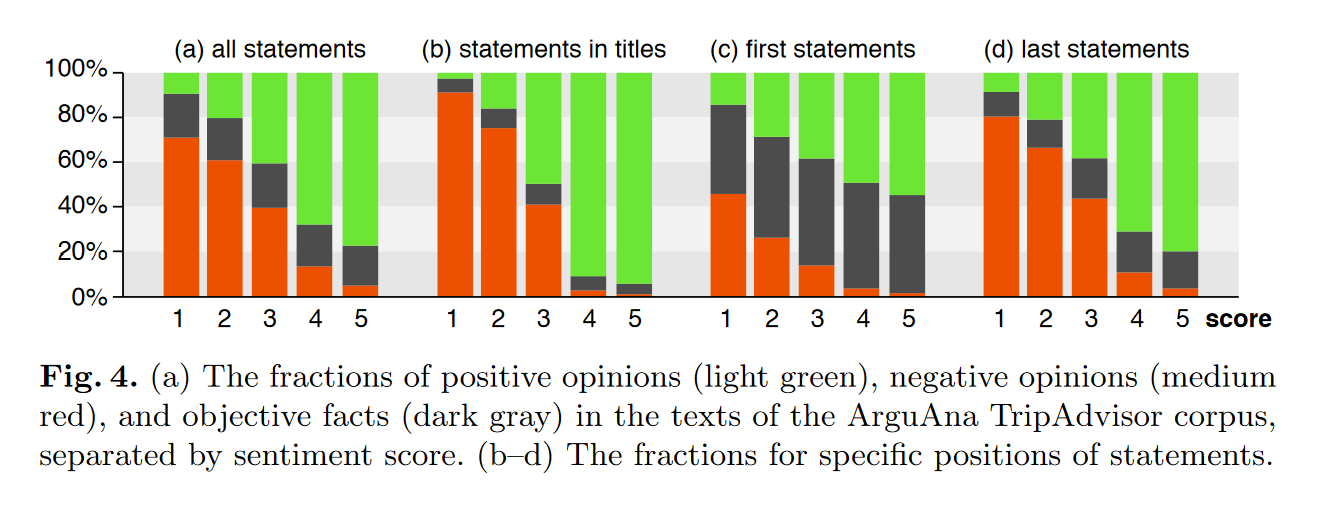

b-The global sentiment score of a hotel review correlates
with the polarity of opinions at certain positions of the review’s text.

c-The global sentiment score of a hotel review depends on the flow of local sentiment in the review’s text.

d-The global sentiment score of a hotel review correlates with the polarity of opinions on certain product features in the review’s text.

- Lexicon-Based Methods for
Sentiment Analysis


There exist two main approaches to the problem of extracting sentiment automatically.1 The lexicon-based approach involves calculating orientation for a document from
the semantic orientation of words or phrases in the document (Turney 2002). The text
classification approach involves building classifiers from labeled instances of texts or
sentences (Pang, Lee, and Vaithyanathan 2002), essentially a supervised classification
task. The latter approach could also be described as a statistical or machine-learning
approach. We follow the first method, in which we use dictionaries of words annotated
with the word’s semantic orientation, or polarity


# Argumentation Polaritty flow 

The most related categories for identifying stance are:

ATTITUDE, POLARITY, INTROSPECTION, and to some extent TEMPER.

Nonetheless,	in	the	general	field	of	argumentation	mining,	many	researchers	experimented	with	using	straightforward	sentiment	features	for	solving	one	or	more	subtasks.	Often,	a	simple	lookup	in	sentiment	lexicons	is	performed	to	determine	a	majority	vote	on	the	polarity	of	a	sentence;	some	systems	try	to	account	for	negations	in	order	to	avoid	obvious	mistakes.	More	elaborate	analyses	have	to	our	knowledge	not	been	employed	yet.		The	sentence	polarity	is	commonly	added	to	the	set	of	features	used	for	computing	the	argumentative	role	of	a	sentence	in	a	text.		However,	Afantenos	et	al.	(2018)	report	that	in	their	experiments	on	predicting	argument	structures	on	microtexts,	sentiment	features	turned	out	to	be	not	useful,	and	hence	were	discarded.	This	might	be	explained	by	the	fact	that	microtexts	do	per	se	not	contain	sentences	that	do	not	belong	to	the	argumentation	(and	thus	could	be	surmised	to	be	'objective');	and	for	distinguishing	claims	and	premises,	the	presence	of	a	sentiment	or	the	polarity	is	generally	not	helpful,	as	the	'monarchy'	example	has	illustrated



	We	pointed	out	that	stance	is	indeed	closely	related	to	argument,	but	computing	it	correctly	can	be	a	difficult	endeavour.	On	the	other	hand,	the	straightforward	sentiment	systems	based	on	prestored	lexical	polarities	are	of	only	limited	use,	and	can	often	actually	be	misleading.		


    For	longer	text,	where	one	needs	to	distinguish	argumentative	from	non-argumentative	sentences,	sentence-level	polarity	might	be	helpful.	One	should	be	aware,	however,	that	sentiment	features	are	then	being	used	as	a	shortcut	for	classifying	‘subjectivity’	in	a	more	general	sense:	Not	all	subjective	utterances	are	characterized	by	polarity;	speculations	or	prognoses	

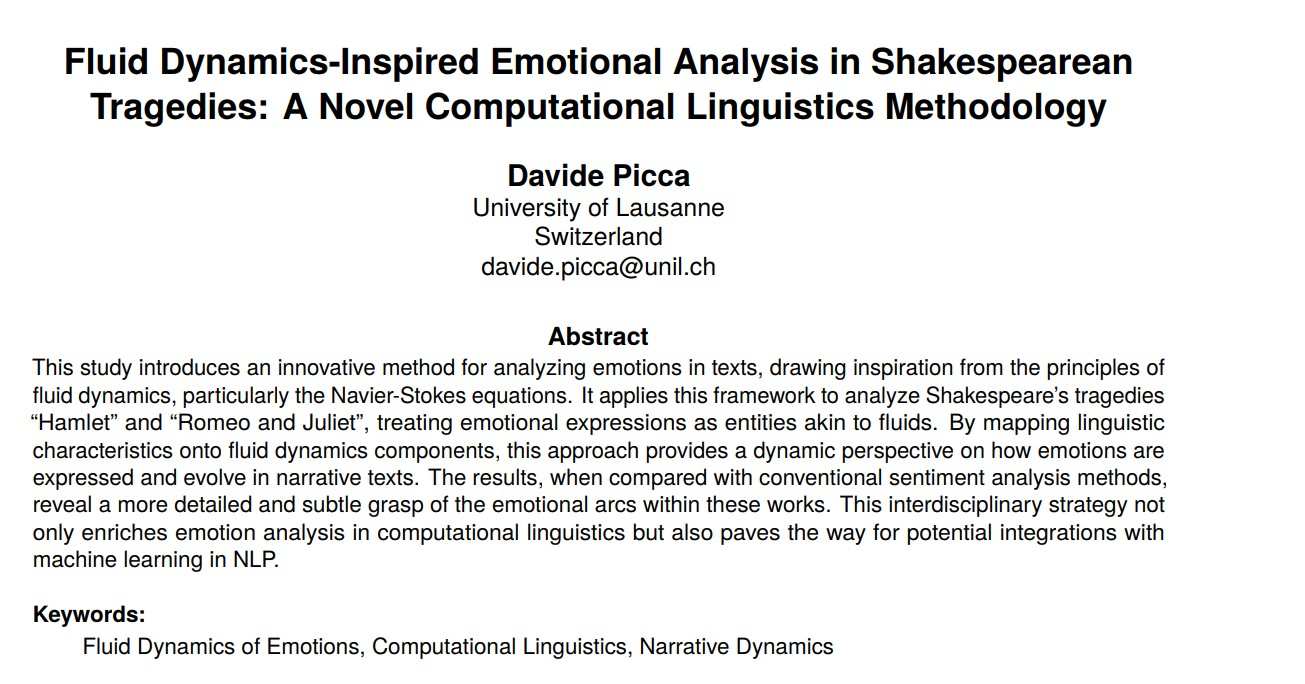

In [ ]:
#Average of two elements based  (ADU + Score,)  ->Visual + stance detection
#M-Arg 
#https://github.com/rafamestre/m-arg_multimodal-argumentation-dataset/tree/main

In [59]:
processed_texts = processor.process_texts(sr[6])

10-Feb-25 16:41:15 - Starting to process


Processing texts:   0%|          | 0/5 [00:00<?, ?it/s]

10-Feb-25 16:41:17 - Saving results to results/processed_texts.csv


In [60]:
processed_texts.shape

(5, 14)

In [51]:
processed_texts

text  \
0                                                   Health insurance companies should not cover treatment in complementary medicine   
1                                                   unless the promised effect and its medical benefit have been concretely proven.   
2                                                                                     Yet this very proof is lacking in most cases.   
3                                                        Patients do often report relief of their complaints after such treatments.   
4  But as long as it is unclear as to how this works, the funds should rather be spent on therapies where one knows with certainty.   

   INTROSPECTION#ecstasy  TEMPER  SENSITIVITY#loathing  \
0               0.920667   0.000                -0.856   
1               0.947000   0.000                 0.000   
2               0.000000   0.000                 0.000   
3               0.936000  -0.153                 0.000   
4               0.937000   0.000                -0.856   

   INTROSPECTION#contentment  ATTITUDE#acceptance  POLARITY  \
0                      0.180                0.274  0.387333   
1                      0.000                0.246  0.683333   
2                      0.000                0.000  0.440000   
3                      0.000                0.000  0.460750   
4                      0.298                0.000  0.222167   

   SENSITIVITY#enthusiasm  ATTITUDE#pleasantness  TEMPER#bliss  \
0                   0.000                  0.000         0.000   
1                   0.877                  0.587         0.940   
2                   0.000                  0.000         0.000   
3                   0.000                  0.000         0.999   
4                   0.992                  0.000         0.000   

   TEMPER#serenity  ATTITUDE#joy  INTROSPECTION#rage  
0            0.000         0.000               0.000  
1            0.000         0.000               0.000  
2            0.244         0.784               0.000  
3            0.214         0.000               0.000  
4            0.000         0.000              -0.844

In [44]:
#https://www.simscale.com/docs/simwiki/numerics-background/what-are-the-navier-stokes-equations/
# predict global sentiment based on sentiment flow
flow_calculator = SentimentFlowCalculator()
results = flow_calculator.calculate_navier_stocker_for_texts(processed_texts)
pd.DataFrame(results)

10-Feb-25 16:38:08 - Starting to calculate Navier-Stocker...


Calculating Navier-Stocker for texts:   0%|          | 0/5 [00:00<?, ?it/s]

10-Feb-25 16:38:08 - Finished calculating texts.
10-Feb-25 16:38:08 - Processed 5 texts.
10-Feb-25 16:38:08 - Saving results to results/navier_stocker_text_results.json


0  \
0  {'text': ('Health insurance companies should not cover treatment in complementary medicine', 'Health insurance companies should not cover treatment in complementary medicine'), 'simulation': [[0.274, 0.0, 0.0, 0.18, 0.9206666666666666, 0.0, 0.38733333333333336, 0.0, -0.856, 0.0, 0.0, 0.0], [0.6123338860481721, 0.43200086611432215, 0.5047677981435976, 0.676041237528495, 1.0755246949311401, 0.36680705870743013, 0.7032712903149382, 0.30607038282665866, -0.30273462583650096, 0.4561038812236383, 0.3236915515048543, 0.41911426772728777]], 'emotion dimension': ['ATTITUDE#acceptance', 'ATTITUDE#joy', 'ATTITUDE#pleasantness', 'INTROSPECTION#contentment', 'INTROSPECTION#ecstasy', 'INTROSPECTION#rage', 'POLARITY', 'SENSITIVITY#enthusiasm', 'SENSITIVITY#loathing', 'TEMPER', 'TEMPER#bliss', 'TEMPER#serenity']}   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         1  \
0  {'text': ('unless the promised effect and its medical benefit have been concretely proven.', 'unless the promised effect and its medical benefit have been concretely proven.'), 'simulation': [[0.246, 0.0, 0.587, 0.0, 0.947, 0.0, 0.6833333333333332, 0.877, 0.0, 0.0, 0.94, 0.0], [0.9496669381013033, 0.7860011537540995, 1.2615320677748818, 0.7469113304300842, 1.5898011814725286, 0.7331479979081074, 1.6294839292405003, 1.0621171619846121, 0.7454620304978522, 0.8412527824565593, 1.1950543095301018, 0.23297490326396067]], 'emotion dimension': ['ATTITUDE#acceptance', 'ATTITUDE#joy', 'ATTITUDE#pleasantness', 'INTROSPECTION#contentment', 'INTROSPECTION#ecstasy', 'INTROSPECTION#rage', 'POLARITY', 'SENSITIVITY#enthusiasm', 'SENSITIVITY#loathing', 'TEMPER', 'TEMPER#bliss', 'TEMPER#serenity']}   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     2  \
0  {'text': ('Yet this very proof is lacking in most cases.', 'Yet this very proof is lacking in most cases.'), 'simulation': [[0.0, 0.784, 0.0, 0.0, 0.0, 0.0, 0.43999999999999995, 0.0, 0.0, 0.0, 0.0, 0.244], [0.38630020474516136, 1.102419894482849, 0.37442007475893196, 0.48747711766658286, 0.4610068979985487, 0.48438549238139766, 0.821738882384954, 0.40313152858494733, 0.46848666943938744, 0.46001263038489154, 0.5165744184226144, 0.8807396205466466]], 'emotion dimension': ['ATTITUDE#acceptance', 'ATTITUDE#joy', 'ATTITUDE#pleasantness', 'INTROSPECTION#contentment', 'INTROSPECTION#ecstasy', 'INTROSPECTION#rage', 'POLARITY', 'SENSITIVITY#enthusiasm', 'SENSITIVITY#loathing', 'TEMPER', 'TEMPER#bliss', 'TEMPER#serenity']}   

                                                                                                                         

In [26]:
emotions = ['ATTITUDE', 'INTROSPECTION#ecstasy', 'INTROSPECTION#loathing', 'POLARITY', 'SENSITIVITY', 'SENSITIVITY#eagerness', 'SENSITIVITY#enthusiasm', 'SENSITIVITY#loathing', 'TEMPER', 'TEMPER#calmness']
emotions

['ATTITUDE',
 'INTROSPECTION#ecstasy',
 'INTROSPECTION#loathing',
 'POLARITY',
 'SENSITIVITY',
 'SENSITIVITY#eagerness',
 'SENSITIVITY#enthusiasm',
 'SENSITIVITY#loathing',
 'TEMPER',
 'TEMPER#calmness']

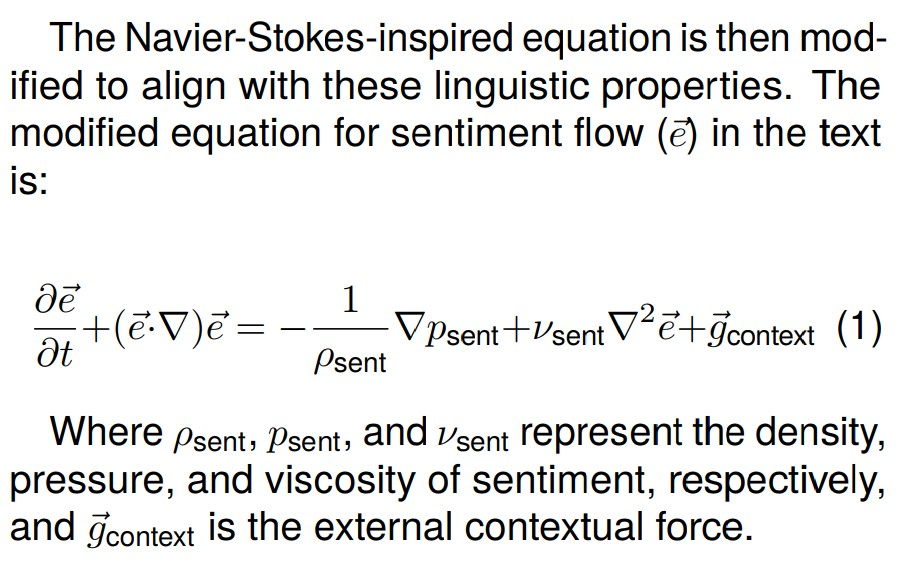

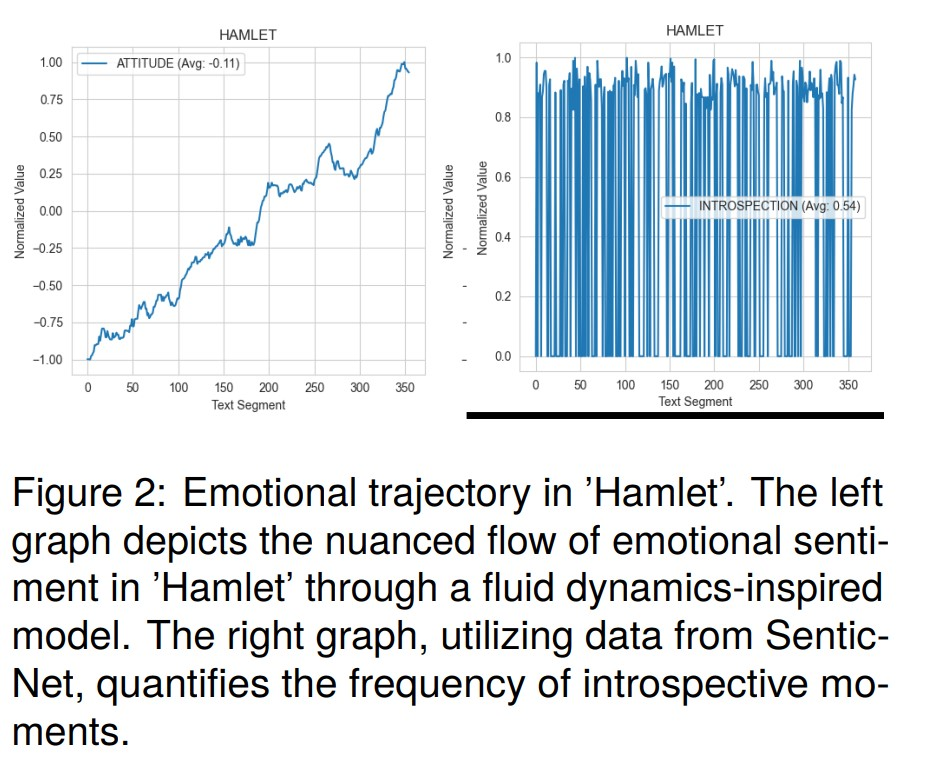

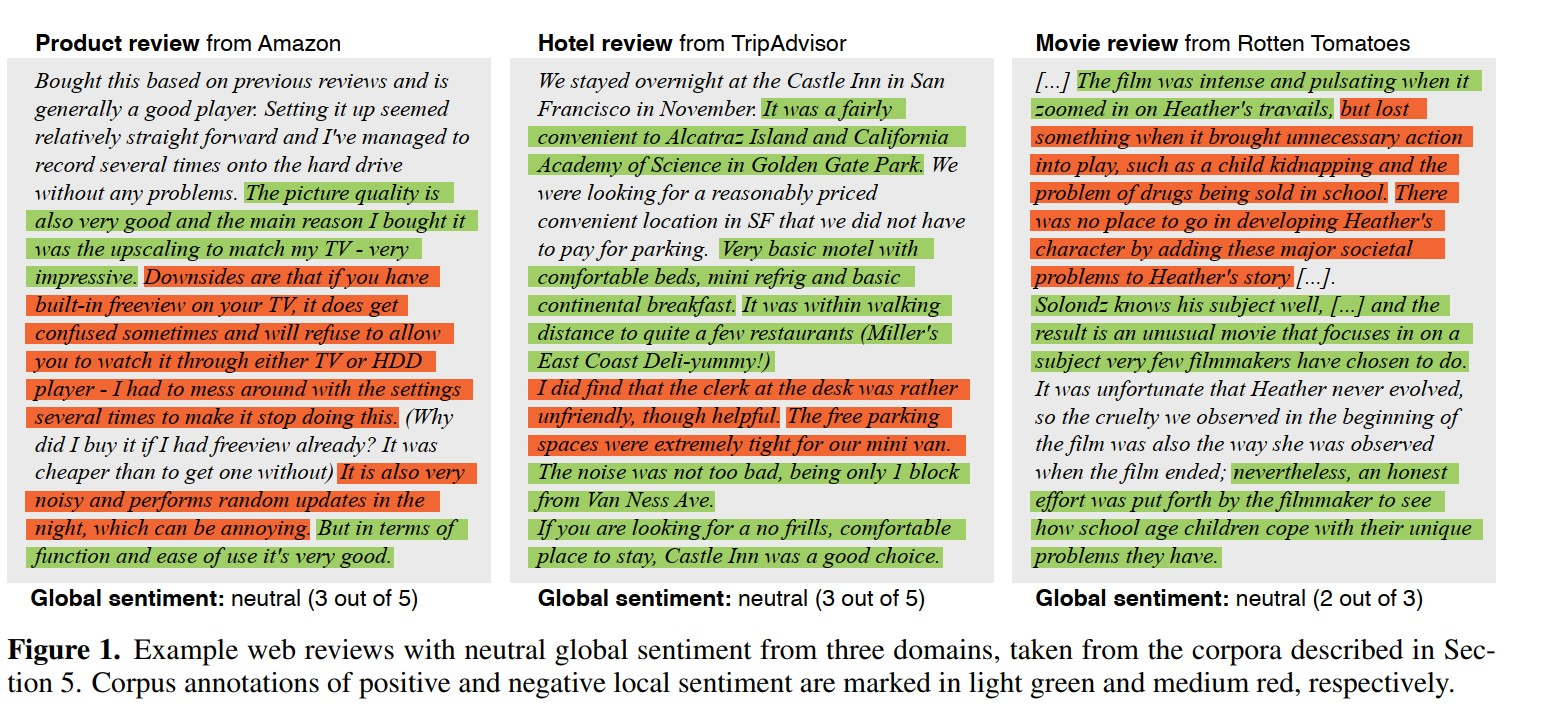

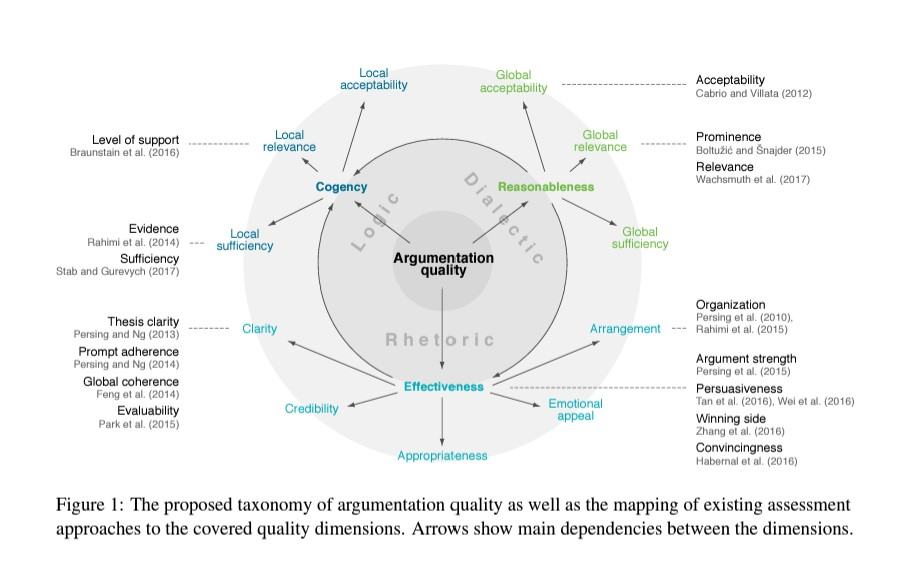